In [1]:
# Import required modules
from importlib import reload
import kika.endf.classes.mf4.plotting
reload(kika.endf.classes.mf4.plotting)
from kika.ace.classes.angular_distribution.comparison_plots import compare_ace_angular_distributions
from kika.endf.read_endf import read_endf
from kika.utils import configure_endf_debug_logging
from kika.endf.classes.mf4.plotting import plot_angular_distribution, plot_legendre_coefficients_from_endf, plot_legendre_coefficient_comparison
import logging

# === DEBUG LOGGING SETUP ===
modules = [
    'kika.endf.parsers.parse_mf4',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [ ]:
endf_file = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
endf01_file = '/home/MONLEON-JUAN/KIKA/kika/sampling/test_endf_pert/endf/26056/0001/26-Fe-56g_0001.txt'
endf02_file = '/home/MONLEON-JUAN/KIKA/kika/sampling/test_endf_pert/endf/26056/0002/26-Fe-56g_0002.txt'


endf = read_endf(endf_file)
endf1 = read_endf(endf01_file)
endf2 = read_endf(endf02_file)

cov = endf.mf[34].to_ang_covmat()

[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 with 20752 lines
[DEBUG] kika.endf.parsers.parse_mf4: Found MT sections: [2, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818]
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT2 with 8712 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT2 with 8712 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT2 header: ZA=26056, AWR=55.454429999999995, LTT=3
[DEBUG] kika.endf.parsers.parse_mf4: MT2 using mixed format (LTT=3)


/home/MONLEON-JUAN/KIKA/kika/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT2
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT51 with 367 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT51 with 367 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT51 header: ZA=26056, AWR=55.454429999999995, LTT=1
[DEBUG] kika.endf.parsers.parse_mf4: MT51 using Legendre expansion format (LTT=1)
[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT51
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT52 with 292 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT52 with 292 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT52 header: ZA=26056, AWR=55.454429999999995, LTT=1
[DEBUG] kika.endf.parsers.parse_mf4: MT52 using Legendre expansion format (LTT=1)
[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT52
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT53 with 309 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT53 with 309 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT53 header: ZA=26056, AWR=55.45

FileNotFoundError: ENDF file not found: /home/MONLEON-JUAN/KIKA/kika/sampling/test_endf_pert2/endf/26056/0001/26-Fe-56g_0001.txt

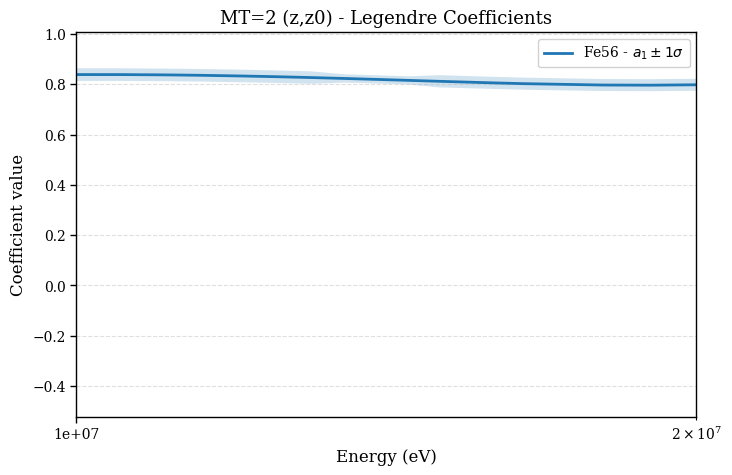

In [ ]:
fig = plot_legendre_coefficients_from_endf(
    endf, 
    mt=2, 
    orders=[1], 
    style='default',
    include_uncertainties=True,
    uncertainty_sigma=1,
    energy_range=(1e7, 2e7),
)

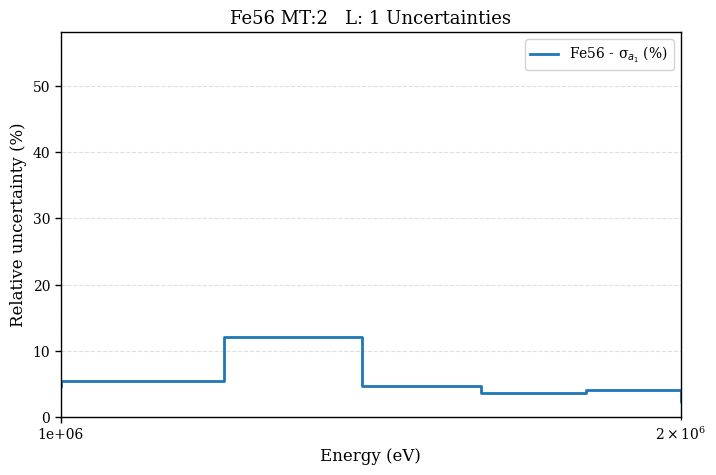

In [ ]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    energy_range=(1e6, 2e6),
);


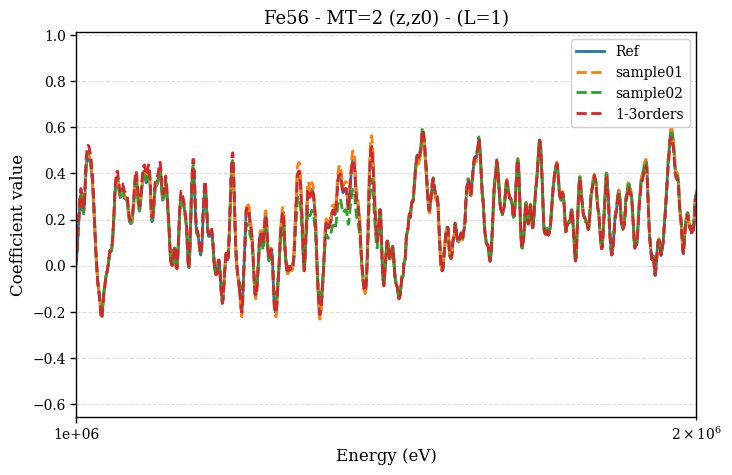

In [ ]:
plot_legendre_coefficient_comparison(
    reference_endf = endf,
    comparison_endfs = [endf1, endf2],
    mt = 2,
    order = 1,
    energy_range= (1e6, 2e6),
    style = 'default',
    include_uncertainties=False,
    uncertainty_sigma=1,
    reference_label = 'Ref',
    comparison_labels = ['sample01', 'sample02', '1-3orders'],
)

In [4]:
ace_file = '/share_snc/snc/JuanMonleon/plot_samples_leg/260560_40.02c'
ace1_file = '/home/MONLEON-JUAN/KIKA/kika/sampling/test_endf_pert/ace/293.6/26056/0001/260560_33_0001.02c'
ace2_file = '/home/MONLEON-JUAN/KIKA/kika/sampling/test_endf_pert/ace/293.6/26056/0002/260560_33_0002.02c'

ace = kika.read_ace(ace_file)
ace1 = kika.read_ace(ace1_file)
ace2 = kika.read_ace(ace2_file)

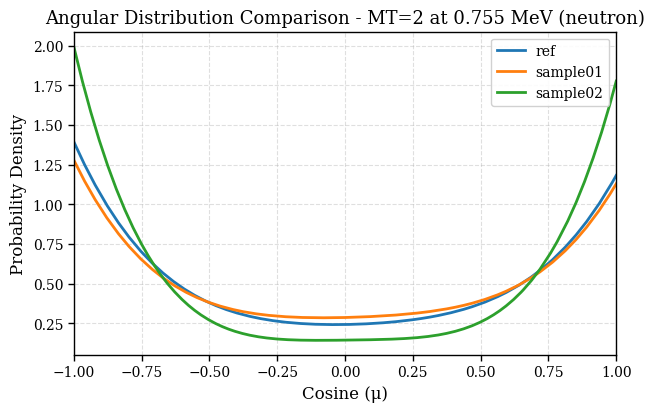

In [5]:
fig, ax = compare_ace_angular_distributions([ace, ace1, ace2], 
                                          mt=2, 
                                          energy=0.755,
                                          labels=['ref', 'sample01', 'sample02'],)